We use Deep network to make the boundary for spiral class. We further use mlxtend library to generate the boundaries for different spirals.

In [ ]:
from matplotlib import cm
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

/home/ashwani/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ashwani/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ashwani/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ashwani/.local/lib/python3.6/site-packages/tensorboard/compat

[0 1 2 3]


Text(0.5, 1.0, 'Data')

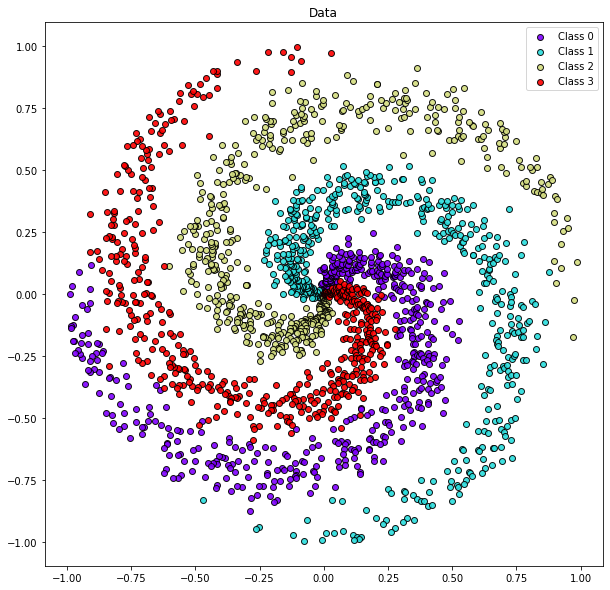

In [ ]:
def create_dataset(N=400, K=2, wind =2, noise = 0.2):
    D = 2
    X = np.zeros((N * K, D))  
    y = np.zeros(N * K)  # class labels
    for j in range(K):
        ix = range(N * j, N * (j + 1))
        r = np.linspace(0, 1, N)  # radius
        t = np.linspace(j * wind, (j + 1) * wind, N) + np.random.randn(N) * noise
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j
    return X, y
noise = 0.5
X, y = create_dataset(N=500, K=4, wind =4.6, noise=0.3)
y = y.astype(int)
plt.figure(figsize=(10, 10))
y_unique = np.unique(y)
print(y_unique)
colors = cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
for this_y, color in zip(y_unique, colors):
    this_X = X[y == this_y]
    plt.scatter(this_X[:, 0], this_X[:, 1],
                c=color[np.newaxis, :],
                alpha=0.9, edgecolor='k',
                label="Class %s" % this_y)
plt.legend(loc="best")
plt.title("Data")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
Y_out=len(np.unique(y))
print(X_train.shape, y_train.shape); print(X_test.shape,Y_out)
# Set the input shape
feature_vector_shape = len(X[0])
input_shape = (feature_vector_shape,)
print(f'Feature shape: {input_shape}')

(1600, 2) (1600,)
(400, 2) 4
Feature shape: (2,)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(128+128+128, activation='relu'),
    tf.keras.layers.Dense(128+128, activation='tanh'),
    tf.keras.layers.Dense(128+128, activation='tanh'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(Y_out)
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 384)               1152      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               98560     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 516       
Total params: 198,916
Trainable params: 198,916
Non-trainable params: 0
__________________________________________________

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = tf.keras.optimizers.Adam(learning_rate=0.0001)
metrics = ["accuracy"]
model.compile(loss=loss, optimizer=optim, metrics=metrics)
# training
batch_size = 64
epochs = 50
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2, validation_split = 0.2);

Epoch 1/100
64/64 - 1s - loss: 1.2575 - accuracy: 0.3273 - val_loss: 1.1928 - val_accuracy: 0.3125
Epoch 2/100
64/64 - 0s - loss: 1.1356 - accuracy: 0.3352 - val_loss: 1.1301 - val_accuracy: 0.3469
Epoch 3/100
64/64 - 0s - loss: 1.0828 - accuracy: 0.3508 - val_loss: 1.0888 - val_accuracy: 0.3625
Epoch 4/100
64/64 - 0s - loss: 1.0270 - accuracy: 0.3922 - val_loss: 1.0317 - val_accuracy: 0.4094
Epoch 5/100
64/64 - 0s - loss: 0.9489 - accuracy: 0.4945 - val_loss: 0.9408 - val_accuracy: 0.5406
Epoch 6/100
64/64 - 0s - loss: 0.8384 - accuracy: 0.6320 - val_loss: 0.8116 - val_accuracy: 0.6313
Epoch 7/100
64/64 - 0s - loss: 0.6959 - accuracy: 0.7133 - val_loss: 0.6871 - val_accuracy: 0.7750
Epoch 8/100
64/64 - 0s - loss: 0.5672 - accuracy: 0.7891 - val_loss: 0.5760 - val_accuracy: 0.8406
Epoch 9/100
64/64 - 0s - loss: 0.4688 - accuracy: 0.8391 - val_loss: 0.4914 - val_accuracy: 0.8469
Epoch 10/100
64/64 - 0s - loss: 0.3984 - accuracy: 0.8602 - val_loss: 0.4256 - val_accuracy: 0.8781
Epoch 11/

In [ ]:
model

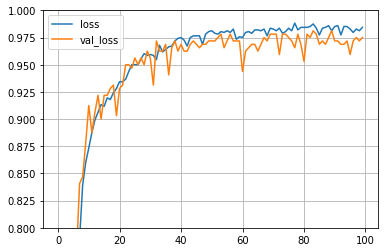

In [ ]:
def plot_loss(history):
    plt.plot(history.history['accuracy'], label='loss')
    plt.plot(history.history['val_accuracy'], label='val_loss')
    plt.ylim([0.8, 1])
    plt.legend()
    plt.grid(True)
plot_loss(history)

One hot encoding is used for the boundary plotting.

In [ ]:
class Onehot2Int(object):
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)
keras_model_no_ohe = Onehot2Int(model)

/home/ashwani/.local/lib/python3.6/site-packages/mlxtend/plotting/decision_regions.py:318: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  **scatter_highlight_kwargs)


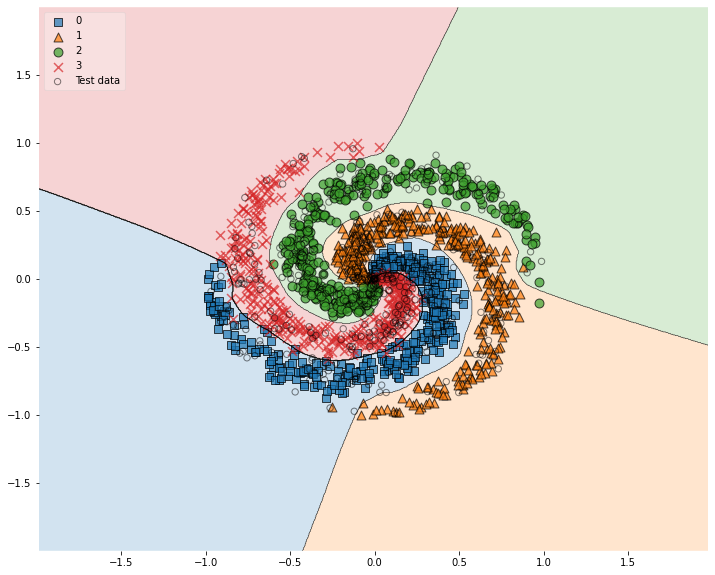

In [ ]:
# Plot decision boundary
contourf_kwargs = {'alpha': 0.2}
scatter_kwargs = {'s': 80, 'alpha': 0.7}
scatter_highlight_kwargs = {'s': 40, 'label': 'Test data', 'alpha': 0.5}
fig = plt.figure(figsize=(12,10))
plot_decision_regions(X_train, y_train, clf=keras_model_no_ohe, legend=2, contourf_kwargs = contourf_kwargs, 
                      scatter_kwargs=scatter_kwargs, X_highlight=X_test, scatter_highlight_kwargs= scatter_highlight_kwargs)
plt.show()